# Load all packages

In [3]:
!pip install matplotlib
!pip install statsmodels
!pip install seaborn
!pip install scikit-learn
!pip install openpyxl

import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import pandas as pd
import seaborn as sns
import sklearn.neighbors as sn
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import scipy.signal as signal
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import shapiro 
from scipy.stats import kstest

# Load the data from Hyperspectral calibration

In [5]:
calibHSI = pd.read_excel('../data/Calib_RABDs.xlsx')
display(calibHSI)

,Unnamed: 0,SampleName,DepthStart_mm,DepthEnd_mm,weight (g),dilution,Total volume,RABD620,RABD670,RABD715,RABD845,RABD830
0,0,C1-1,510,520,0.5066,1,3,1.000543,0.999554,1.002725,0.998265,0.991278
1,1,C1-2,570,580,0.5265,1,3,1.000758,1.003030,1.003396,0.997679,0.991728
2,2,B1-2,300,310,0.5293,1,3,1.000230,0.997570,1.006509,0.999043,0.993018
3,3,B1-2,400,410,0.5072,1,3,1.001288,0.995181,1.003832,1.000731,1.000873
4,4,B1-2,500,510,0.5070,1,3,1.002085,0.996406,1.005268,0.999786,1.000257
5,5,B1-2,800,810,0.5112,1,3,1.001102,0.999079,1.003776,0.998330,0.992447
6,6,B1-2,900,910,0.5026,1,3,1.002708,0.996101,1.005398,0.999266,1.002791
7,7,A2-2,700,710,0.5028,1,5,1.003503,1.012935,0.996508,1.000880,0.991702
8,8,A2-2,900,910,0.5180,1,5,1.002802,1.012306,0.996479,0.999743,0.992237
9,9,A2-3,300,310,0.5123,1,10,1.008281,1.038394,1.068685,1.005900,1.003254


# Load spectrophotometer data

For now, the spectrophotometer data needs to be in the same order as the sample list, but this will be soon automitized, so the order doesn't matter.

In [6]:
calibUV = pd.read_excel('../data/SourceData/DD07_Spectrophotometer.xlsx')#  header=0)
display(calibUV)

,Wavelength (nm),DD07_C1-1_51-52,DD07_C1-2_57-58,DD07_B1-2_30-31,DD07_B1-2_40-41,DD07_B1-2_50-51,DD07_B1-2_80-81,DD07_B1-2_90-91,DD07_A2-2_70-71,DD07_A2-2_90-91,DD07_A2-3_30-31,DD07_A2-3_40-41,DD07_A2-3_90-91,DD07_blank,DD07_blank2
0,350.0,0.288,0.258,0.365,0.385,0.442,0.461,0.435,0.376,0.390,1.005,0.728,1.244,0.0,0.0
1,350.1,0.287,0.258,0.365,0.385,0.441,0.461,0.434,0.376,0.391,1.005,0.729,1.246,0.0,0.0
2,350.2,0.287,0.258,0.364,0.384,0.440,0.460,0.433,0.376,0.391,1.005,0.730,1.248,0.0,0.0
3,350.3,0.287,0.257,0.363,0.383,0.438,0.459,0.432,0.376,0.391,1.005,0.731,1.249,0.0,0.0
4,350.4,0.287,0.257,0.362,0.382,0.437,0.458,0.431,0.376,0.392,1.005,0.732,1.251,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,899.6,0.000,0.000,0.000,0.001,0.000,0.000,0.027,0.194,0.144,0.121,0.030,0.057,0.0,0.0
5497,899.7,0.000,0.000,0.000,0.001,0.000,0.000,0.027,0.194,0.144,0.121,0.030,0.057,0.0,0.0
5498,899.8,0.000,0.000,0.000,0.001,0.000,0.000,0.027,0.194,0.144,0.121,0.030,0.057,0.0,0.0
5499,899.9,0.000,0.000,0.000,0.001,0.000,0.000,0.027,0.194,0.144,0.121,0.031,0.058,0.0,0.0


# Plotting Spectrophotometer data to check the phycocyanin peaks

Text(0.5, 1.0, 'UV-Vis Absorbance Spectra')

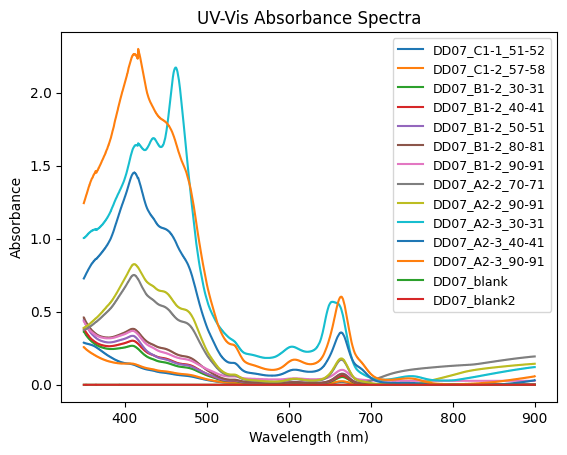

: 

In [ ]:
calibUV.plot(x='Wavelength (nm)')
plt.legend(loc="best", fontsize=9)
ax = plt.gca()
#ax.set_ylim([0, 1.1])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('UV-Vis Absorbance Spectra')


# Finding maxima and minima of the absorbances for TChl and Bphe

Looking for the pigment absorbance peak for Chrorophylls at 640-700nm and for Bacteriapheophytin-a in the range from 700-780nm.
These can be adjusted if one aims to extract absorption peaks of other subsatnces.

Further we look up for the baseline values to baseline the absorbance peaks.

In [51]:
maximTChl = calibUV.loc[(calibUV['Wavelength (nm)'] >= 640) & (calibUV['Wavelength (nm)'] <= 700)].max(axis=0)
maximBphe = calibUV.loc[(calibUV['Wavelength (nm)'] >= 700) & (calibUV['Wavelength (nm)'] <= 780)].max(axis=0)
baseline = calibUV.min(axis=0)

In [52]:
colnames = calibUV.columns
data = { "ID" : colnames,
        'maxTChl': maximTChl,
        'maxBphe': maximBphe, 
       'baseline': baseline}
df1 = pd.DataFrame(data)
df1 = df1[:-2]
df1 = df1[df1.ID != 'Wavelength (nm)']
print(df1)

                              ID  maxTChl  maxBphe  baseline
DD07_C1-1_51-52  DD07_C1-1_51-52    0.020    0.002     0.000
DD07_C1-2_57-58  DD07_C1-2_57-58    0.024    0.002     0.000
DD07_B1-2_30-31  DD07_B1-2_30-31    0.053    0.004     0.000
DD07_B1-2_40-41  DD07_B1-2_40-41    0.061    0.005     0.000
DD07_B1-2_50-51  DD07_B1-2_50-51    0.076    0.005     0.000
DD07_B1-2_80-81  DD07_B1-2_80-81    0.074    0.005     0.000
DD07_B1-2_90-91  DD07_B1-2_90-91    0.102    0.030     0.027
DD07_A2-2_70-71  DD07_A2-2_70-71    0.172    0.121     0.020
DD07_A2-2_90-91  DD07_A2-2_90-91    0.180    0.038     0.003
DD07_A2-3_30-31  DD07_A2-3_30-31    0.568    0.059     0.029
DD07_A2-3_40-41  DD07_A2-3_40-41    0.358    0.048     0.001
DD07_A2-3_90-91  DD07_A2-3_90-91    0.603    0.074     0.004


### Baselining

In [53]:
df1['AbsTChl'] = maximTChl - baseline
df1['AbsBphe'] = maximBphe - baseline
print(df1)

                              ID  maxTChl  maxBphe  baseline  AbsTChl  AbsBphe
DD07_C1-1_51-52  DD07_C1-1_51-52    0.020    0.002     0.000    0.020    0.002
DD07_C1-2_57-58  DD07_C1-2_57-58    0.024    0.002     0.000    0.024    0.002
DD07_B1-2_30-31  DD07_B1-2_30-31    0.053    0.004     0.000    0.053    0.004
DD07_B1-2_40-41  DD07_B1-2_40-41    0.061    0.005     0.000    0.061    0.005
DD07_B1-2_50-51  DD07_B1-2_50-51    0.076    0.005     0.000    0.076    0.005
DD07_B1-2_80-81  DD07_B1-2_80-81    0.074    0.005     0.000    0.074    0.005
DD07_B1-2_90-91  DD07_B1-2_90-91    0.102    0.030     0.027    0.075    0.003
DD07_A2-2_70-71  DD07_A2-2_70-71    0.172    0.121     0.020    0.152    0.101
DD07_A2-2_90-91  DD07_A2-2_90-91    0.180    0.038     0.003    0.177    0.035
DD07_A2-3_30-31  DD07_A2-3_30-31    0.568    0.059     0.029    0.539    0.030
DD07_A2-3_40-41  DD07_A2-3_40-41    0.358    0.048     0.001    0.357    0.047
DD07_A2-3_90-91  DD07_A2-3_90-91    0.603    0.074  

## Concentration calcualtion and assigning the cocentrations to the HSI data

Please note, that at this point, the order of the samples in both files -  calibUV and calibHSI - must be the same. 
Automatization will come soon.

In [54]:
W = calibHSI['weight (g)']
D = calibHSI['dilution']
V = calibHSI['Total volume']
df1 = df1.assign(Weight=pd.Series(W).values)
df1 = df1.assign(Dil=pd.Series(D).values)
df1 = df1.assign(Vol=pd.Series(V).values)
display(df1)

,ID,maxTChl,maxBphe,baseline,AbsTChl,AbsBphe,Weight,Dil,Vol
DD07_C1-1_51-52,DD07_C1-1_51-52,0.020,0.002,0.000,0.020,0.002,0.5066,1,3
DD07_C1-2_57-58,DD07_C1-2_57-58,0.024,0.002,0.000,0.024,0.002,0.5265,1,3
DD07_B1-2_30-31,DD07_B1-2_30-31,0.053,0.004,0.000,0.053,0.004,0.5293,1,3
DD07_B1-2_40-41,DD07_B1-2_40-41,0.061,0.005,0.000,0.061,0.005,0.5072,1,3
DD07_B1-2_50-51,DD07_B1-2_50-51,0.076,0.005,0.000,0.076,0.005,0.5070,1,3
DD07_B1-2_80-81,DD07_B1-2_80-81,0.074,0.005,0.000,0.074,0.005,0.5112,1,3
DD07_B1-2_90-91,DD07_B1-2_90-91,0.102,0.030,0.027,0.075,0.003,0.5026,1,3
DD07_A2-2_70-71,DD07_A2-2_70-71,0.172,0.121,0.020,0.152,0.101,0.5028,1,5
DD07_A2-2_90-91,DD07_A2-2_90-91,0.180,0.038,0.003,0.177,0.035,0.5180,1,5
DD07_A2-3_30-31,DD07_A2-3_30-31,0.568,0.059,0.029,0.539,0.030,0.5123,1,10


### Concetration calculation

Calculation of the concentrations using Lamber-Beer law: = α*l*c ↔ E/(α*l)= c. 
Mass extintion coefficient E for 100%Acetone total choropigments (80.77 × 10−3 L cm−1 g−1) for chloropigments a at 666 nm (Jeffrey and Humphrey, 1975) and 52.855 × 10−3 L cm−1 g−1 for bacteriopheophytin a at 750 nm  (Fiedor et al., 2002).

In [55]:
df1['TChl ug/g'] = ((df1.AbsTChl/0.08077)/df1.Dil * df1.Vol / df1.Weight) 
df1['Bphe ug/g'] = ((df1.AbsBphe/0.052855)/df1.Dil* df1.Vol /df1.Weight)
display(df1)

,ID,maxTChl,maxBphe,baseline,AbsTChl,AbsBphe,Weight,Dil,Vol,TChl ug/g,Bphe ug/g
DD07_C1-1_51-52,DD07_C1-1_51-52,0.020,0.002,0.000,0.020,0.002,0.5066,1,3,1.466344,0.224078
DD07_C1-2_57-58,DD07_C1-2_57-58,0.024,0.002,0.000,0.024,0.002,0.5265,1,3,1.693106,0.215609
DD07_B1-2_30-31,DD07_B1-2_30-31,0.053,0.004,0.000,0.053,0.004,0.5293,1,3,3.719162,0.428937
DD07_B1-2_40-41,DD07_B1-2_40-41,0.061,0.005,0.000,0.061,0.005,0.5072,1,3,4.467060,0.559533
DD07_B1-2_50-51,DD07_B1-2_50-51,0.076,0.005,0.000,0.076,0.005,0.5070,1,3,5.567713,0.559754
DD07_B1-2_80-81,DD07_B1-2_80-81,0.074,0.005,0.000,0.074,0.005,0.5112,1,3,5.376653,0.555155
DD07_B1-2_90-91,DD07_B1-2_90-91,0.102,0.030,0.027,0.075,0.003,0.5026,1,3,5.542554,0.338793
DD07_A2-2_70-71,DD07_A2-2_70-71,0.172,0.121,0.020,0.152,0.101,0.5028,1,5,18.714070,19.002469
DD07_A2-2_90-91,DD07_A2-2_90-91,0.180,0.038,0.003,0.177,0.035,0.5180,1,5,21.152584,6.391786
DD07_A2-3_30-31,DD07_A2-3_30-31,0.568,0.059,0.029,0.539,0.030,0.5123,1,10,130.260976,11.079262


### Assigning the concetration data to the HSI dataset

In [56]:
df_temporary = calibHSI
df_calib = df_temporary.assign(TChl_ugg = pd.Series(df1['TChl ug/g']).values)
df_calib = df_calib.assign(Bphe_ugg = pd.Series(df1['Bphe ug/g']).values)
print(df_calib)

    Unnamed: 0 SampleName  DepthStart_mm  DepthEnd_mm  weight (g)  dilution  \
0            0       C1-1            510          520      0.5066         1   
1            1       C1-2            570          580      0.5265         1   
2            2       B1-2            300          310      0.5293         1   
3            3       B1-2            400          410      0.5072         1   
4            4       B1-2            500          510      0.5070         1   
5            5       B1-2            800          810      0.5112         1   
6            6       B1-2            900          910      0.5026         1   
7            7       A2-2            700          710      0.5028         1   
8            8       A2-2            900          910      0.5180         1   
9            9       A2-3            300          310      0.5123         1   
10          10       A2-3            400          410      0.5094         1   
11          11       A2-3            900          91

### Data export (optional)

You can export this calibration dataset if you wish to perform the LR differently.

In [57]:
df_calib.to_excel("../data/Proxy-Proxy_calibration.xlsx")

# Testing data normality before performing LR

Plotting the data distribution in a histogram.

(array([7., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1.]),
 array([ 0.21560896,  1.4661409 ,  2.71667285,  3.9672048 ,  5.21773675,
         6.4682687 ,  7.71880064,  8.96933259, 10.21986454, 11.47039649,
        12.72092843, 13.97146038, 15.22199233, 16.47252428, 17.72305622,
        18.97358817, 20.22412012, 21.47465207, 22.72518402, 23.97571596,
        25.22624791]),
 <BarContainer object of 20 artists>)

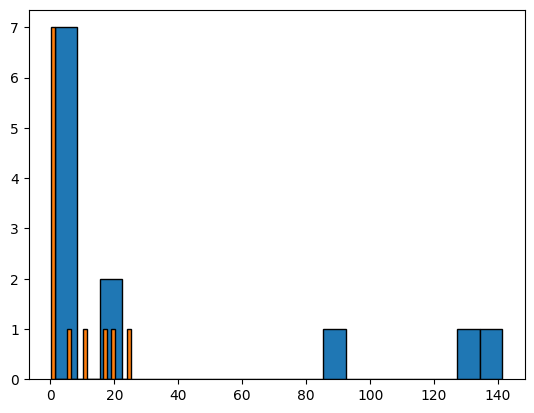

In [58]:
plt.hist(df_calib['TChl_ugg'], edgecolor='black', bins=20)
plt.hist(df_calib['Bphe_ugg'], edgecolor='black', bins=20)

For this particular dataset, we see that the data are sparse and not normaly distributed. This should be constrained already when selecting the calibration samples. The RABD values should cover entire range of concentrations. In that way, we ensure that at least the RABD data are normally distributed.

### Q-Q plot

Creating Q-Q plot:
Line = '45' works well for z-scored data, meaning that the distribution has mean = 0 and sd = 1. 
Line = 's' is used to see the fit against standardized line (the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them)
Line = 'q' is used to shwo the line fit through the quartiles - most commonly used.
Line = 'r' for to see the fit to regression line. 

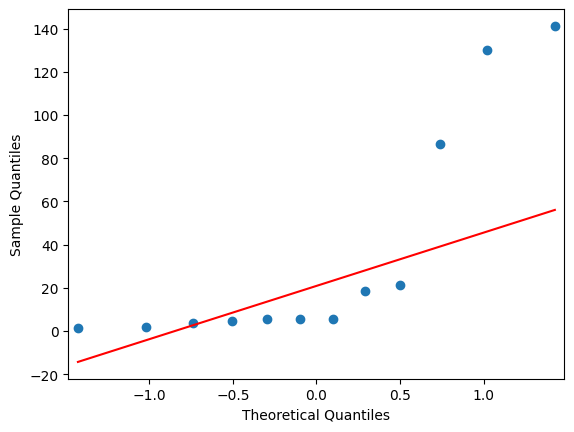

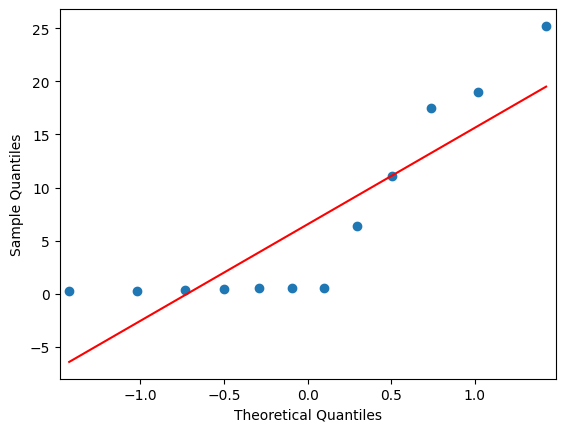

In [59]:
fig = sm.qqplot(df_calib['TChl_ugg'], line='q')
fig = sm.qqplot(df_calib['Bphe_ugg'], line='q')
plt.show()

### Shapiro-Wilk test

Further we perform Shapiro-Wilk test for normality

In [60]:
shapiro(df_calib['TChl_ugg'])

ShapiroResult(statistic=np.float64(0.6725545729337112), pvalue=np.float64(0.0004643211337662652))

From the output we can see that the test statistic is 0.67 and the corresponding p-value is 0.0004.
Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test, which means that the data does not come from a normal distribution.

In [61]:
shapiro(df_calib['Bphe_ugg'])

ShapiroResult(statistic=np.float64(0.7564576842174038), pvalue=np.float64(0.003123767108369793))

### Kolmogorov-Smirnov test

In [62]:
kstest(df_calib['TChl_ugg'], 'norm')

KstestResult(statistic=np.float64(0.9287227560439137), pvalue=np.float64(3.439068133332883e-14), statistic_location=np.float64(1.466344390238037), statistic_sign=np.int8(-1))

From the output we can see that the test statistic is 0.928 and the corresponding p-value is 3.44 e-14.
Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test = the data does not come from a normal distribution.

In [63]:
kstest(df_calib['Bphe_ugg'], 'norm')

KstestResult(statistic=np.float64(0.58535371313678), pvalue=np.float64(0.00019376933315293644), statistic_location=np.float64(0.21560895650385764), statistic_sign=np.int8(-1))

For Bacteriopheophytine the data are normally distributed.

To fix this problem of not-notmal distribution, we can either perform data transpormation, e.g., lof-transformation, or we search for outliers. In our case, the easiest solution is to have more datapoints.

### Searching for outliers

#### Z-score method

In [64]:
df = df_calib
# Calculate Z-scores
df['TChl_z_score'] = (df['TChl_ugg'] - df['TChl_ugg'].mean()) / df['TChl_ugg'].std()
df['Bphe_z_score'] = (df['Bphe_ugg'] - df['Bphe_ugg'].mean()) / df['Bphe_ugg'].std()

# Filter out outliers
threshold = 3
df_cleaned = df[df['TChl_z_score'].abs() <= threshold]
df_cleaned = df[df['Bphe_z_score'].abs() <= threshold]
print(df_cleaned)

    Unnamed: 0 SampleName  DepthStart_mm  DepthEnd_mm  weight (g)  dilution  \
0            0       C1-1            510          520      0.5066         1   
1            1       C1-2            570          580      0.5265         1   
2            2       B1-2            300          310      0.5293         1   
3            3       B1-2            400          410      0.5072         1   
4            4       B1-2            500          510      0.5070         1   
5            5       B1-2            800          810      0.5112         1   
6            6       B1-2            900          910      0.5026         1   
7            7       A2-2            700          710      0.5028         1   
8            8       A2-2            900          910      0.5180         1   
9            9       A2-3            300          310      0.5123         1   
10          10       A2-3            400          410      0.5094         1   
11          11       A2-3            900          91

Using the z-score method, we don't find outliers in our data.

#### Interquartile Range (IQR) Method

In [65]:
# Calculate Q1 and Q3
Q1 = df['TChl_ugg'].quantile(0.25)
Q3 = df['TChl_ugg'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
TChl_cleaned = df[(df['TChl_ugg'] >= lower_bound) & (df['TChl_ugg'] <= upper_bound)]
print(TChl_cleaned)

    Unnamed: 0 SampleName  DepthStart_mm  DepthEnd_mm  weight (g)  dilution  \
0            0       C1-1            510          520      0.5066         1   
1            1       C1-2            570          580      0.5265         1   
2            2       B1-2            300          310      0.5293         1   
3            3       B1-2            400          410      0.5072         1   
4            4       B1-2            500          510      0.5070         1   
5            5       B1-2            800          810      0.5112         1   
6            6       B1-2            900          910      0.5026         1   
7            7       A2-2            700          710      0.5028         1   
8            8       A2-2            900          910      0.5180         1   
10          10       A2-3            400          410      0.5094         1   

    Total volume   RABD620   RABD670   RABD715   RABD845   RABD830   TChl_ugg  \
0              3  1.000543  0.999554  1.002725  0

This method removed 2 outliers, sample 9 and 11 based on the Total chloropigments concentrations.

##### Testing Bphe

In [66]:
# Calculate Q1 and Q3
Q1 = df['Bphe_ugg'].quantile(0.25)
Q3 = df['Bphe_ugg'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
Bphe_cleaned = df[(df['Bphe_ugg'] >= lower_bound) & (df['Bphe_ugg'] <= upper_bound)]
print(Bphe_cleaned)

    Unnamed: 0 SampleName  DepthStart_mm  DepthEnd_mm  weight (g)  dilution  \
0            0       C1-1            510          520      0.5066         1   
1            1       C1-2            570          580      0.5265         1   
2            2       B1-2            300          310      0.5293         1   
3            3       B1-2            400          410      0.5072         1   
4            4       B1-2            500          510      0.5070         1   
5            5       B1-2            800          810      0.5112         1   
6            6       B1-2            900          910      0.5026         1   
7            7       A2-2            700          710      0.5028         1   
8            8       A2-2            900          910      0.5180         1   
9            9       A2-3            300          310      0.5123         1   
10          10       A2-3            400          410      0.5094         1   
11          11       A2-3            900          91

This method refound no outliers in Bphe concentrations.

# Plotting Linear regression of Total Chlorophylls and RABD670 - Hyperspectral calibration

[Text(0.5, 0, 'RABD$_{670}$'), Text(0, 0.5, 'Total chlorophylls ($\\mu$g/ml)')]

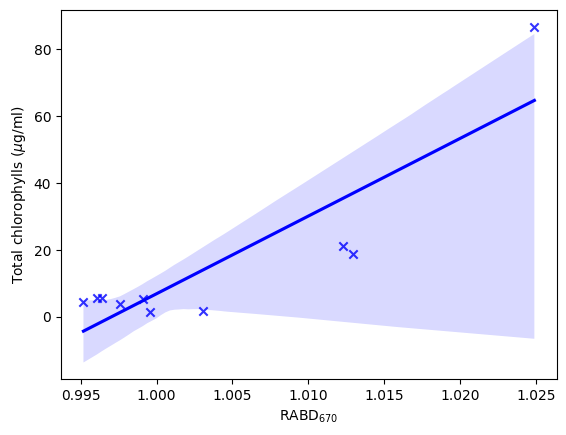

In [67]:
pl1 = sns.regplot(data=TChl_cleaned, x='RABD670', y = 'TChl_ugg', ci=95, n_boot=1000, marker="x", color="b", line_kws=dict(color="b")) # here we used the dataset cleaned for outliers, but it can be replaced by the entire dataset df_calib
pl1.set(xlabel = 'RABD$_{670}$', 
       ylabel= 'Total chlorophylls ($\mu$g/ml)')

In [68]:
#calculate slope and intercept of regression equation
slope, intercept, r, pl1, sterr = sp.stats.linregress(x=pl1.get_lines()[0].get_xdata(),
                                                       y=pl1.get_lines()[0].get_ydata())
#display slope and intercept of regression equation
print(intercept, slope)

-2315.3788766581984 2322.21873319368


In [69]:
y = np.array(TChl_cleaned['TChl_ugg']).reshape(-1, 1) 
X = np.array(TChl_cleaned['RABD670']).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
target_range = np.max(y_test) - np.min(y_test)
percentage_accuracy = (1.0 - (rmse / target_range)) * 100

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 17.514920398056166


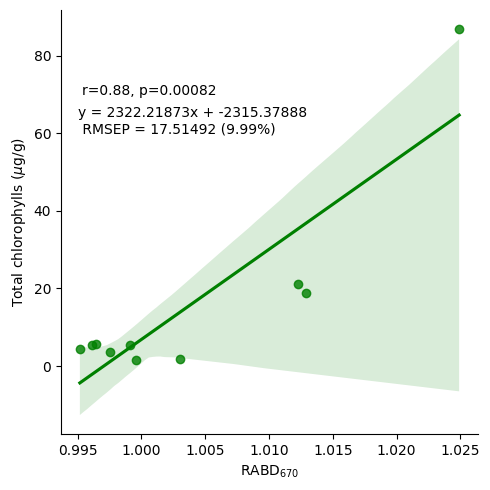

In [70]:
pl2 = sns.lmplot(data=TChl_cleaned, x='RABD670', y = 'TChl_ugg', scatter_kws={"color": "green"}, line_kws={"color":"green"})# ci=95, n_boot=1000, marker="x", color="b", line_kws=dict(color="b"))
pl2.set(xlabel='RABD$_{670}$',
        ylabel = 'Total chlorophylls ($\mu$g/g)')#,
        #xlim = [0,160], ylim = [0.98,1.1])# yticks = [0.98,1,1.02,1.04,1.06, 1.08, 1.1]) 
plt.text(0.995, 60, 'y = ' + str(round(slope,5)) + 'x + ' + str(round(intercept,5)) + '\n RMSEP = ' + str(round(rmse, 6)) + ' (' + str(round(percentage_accuracy,2)) + '%)')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['TChl_ugg'], data['RABD670'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

pl2.map_dataframe(annotate)
#add regression equation to plot
#plt.text(2, 1.38, 'RMSE = ' + str(round(rmse, 6)))


In [71]:
path = r'../data/HSI'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_index = {}
for f in all_files:
    sample_df = pd.read_csv(f)
    sample_df['TChl ug/g'] = (slope * sample_df.RABD670 + intercept).clip(lower=0)
    display(sample_df)
    df_index[f] = sample_df

,depth,RMean,RABD620,RABD670,RABD715,RABD845,RABD830,depth [mm],TChl ug/g
0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0336,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,0.0672,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,0.1008,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,0.1344,NaN
...,...,...,...,...,...,...,...,...,...
17178,17178,NaN,NaN,NaN,NaN,NaN,NaN,577.1808,NaN
17179,17179,NaN,NaN,NaN,NaN,NaN,NaN,577.2144,NaN
17180,17180,NaN,NaN,NaN,NaN,NaN,NaN,577.2480,NaN
17181,17181,NaN,NaN,NaN,NaN,NaN,NaN,577.2816,NaN


,depth,RMean,RABD620,RABD670,RABD715,RABD845,RABD830,depth [mm],TChl ug/g
0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0329,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,0.0658,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0987,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,0.1316,NaN
...,...,...,...,...,...,...,...,...,...
30152,30152,NaN,NaN,NaN,NaN,NaN,NaN,992.0008,NaN
30153,30153,NaN,NaN,NaN,NaN,NaN,NaN,992.0337,NaN
30154,30154,NaN,NaN,NaN,NaN,NaN,NaN,992.0666,NaN
30155,30155,NaN,NaN,NaN,NaN,NaN,NaN,992.0995,NaN


,depth,RMean,RABD620,RABD670,RABD715,RABD845,RABD830,depth [mm],TChl ug/g
0,0,0.078438,0.996081,0.994287,1.002980,0.995604,0.995494,0.0000,0.000000
1,1,0.081445,0.996956,0.993991,1.001620,0.996861,0.995228,0.0357,0.000000
2,2,0.084109,0.997630,0.993967,1.000540,0.997826,0.994872,0.0714,0.000000
3,3,0.086449,0.998129,0.994180,0.999737,0.998526,0.994439,0.1071,0.000000
4,4,0.088490,0.998475,0.994597,0.999168,0.998986,0.993946,0.1428,0.000000
...,...,...,...,...,...,...,...,...,...
15115,15115,0.108387,1.003070,1.000070,1.003560,0.997449,0.993345,539.6055,7.002412
15116,15116,0.108890,1.003180,1.000560,1.003020,0.997133,0.992640,539.6412,8.140299
15117,15117,0.109508,1.003230,1.001140,1.002250,0.996847,0.991709,539.6769,9.487186
15118,15118,0.110250,1.003200,1.001830,1.001250,0.996600,0.990526,539.7126,11.089517


,depth,RMean,RABD620,RABD670,RABD715,RABD845,RABD830,depth [mm],TChl ug/g
0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.031,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,0.062,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,0.093,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,0.124,NaN
...,...,...,...,...,...,...,...,...,...
32233,32233,0.049254,1.00247,0.994556,1.00460,0.997220,0.998783,999.223,0.0
32234,32234,0.048431,1.00353,0.993292,1.00380,0.997895,0.998592,999.254,0.0
32235,32235,0.048660,1.00487,0.991905,1.00281,0.998748,0.998212,999.285,0.0
32236,32236,0.050067,1.00653,0.990390,1.00161,0.999793,0.997623,999.316,0.0


,depth,RMean,RABD620,RABD670,RABD715,RABD845,RABD830,depth [mm],TChl ug/g
0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0309,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,0.0618,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0927,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,0.1236,NaN
...,...,...,...,...,...,...,...,...,...
30759,30759,NaN,NaN,NaN,NaN,NaN,NaN,950.4531,NaN
30760,30760,NaN,NaN,NaN,NaN,NaN,NaN,950.4840,NaN
30761,30761,NaN,NaN,NaN,NaN,NaN,NaN,950.5149,NaN
30762,30762,NaN,NaN,NaN,NaN,NaN,NaN,950.5458,NaN


# Linear regression for Bacteriopheophytin-a and RABD845

[Text(0.5, 0, 'RABD$_{845}$'),
 Text(0, 0.5, ' Bacteriopheophytin-a ($\\mu$g/g)')]

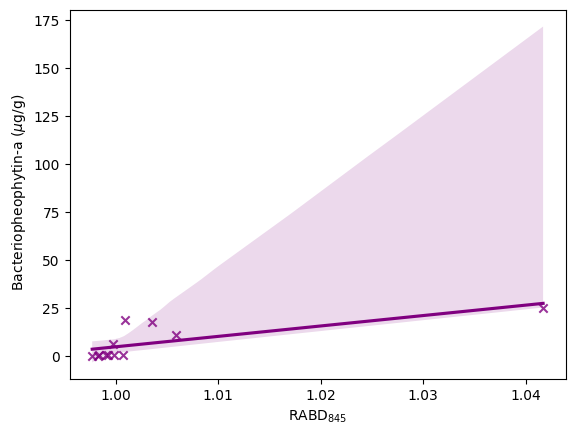

In [72]:
pl3 = sns.regplot(data=Bphe_cleaned, x='RABD845', y = 'Bphe_ugg', ci=95, n_boot=1000, marker="x", color="purple", line_kws=dict(color="purple")) # here we used the dataset cleaned for outliers, but it can be replaced by the entire dataset df_calib
pl3.set(xlabel = 'RABD$_{845}$', 
       ylabel= ' Bacteriopheophytin-a ($\mu$g/g)')

In [73]:
#calculate slope and intercept of regression equation
slope, intercept, r, pl3, sterr = sp.stats.linregress(x=pl3.get_lines()[0].get_xdata(),
                                                       y=pl3.get_lines()[0].get_ydata())
#display slope and intercept of regression equation
print(intercept, slope)

-536.8443396056934 541.658396131382


In [74]:
y1 = np.array(df_calib['Bphe_ugg']).reshape(-1, 1) 
X1 = np.array(df_calib['RABD845']).reshape(-1, 1) 

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

# Calculate RMSE (Root Mean Squared Error)
rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
target_range1 = np.max(y1_test) - np.min(y1_test)
percentage_accuracy1 = (1.0 - (rmse1 / target_range1)) * 100

print(f"Root Mean Squared Error: {rmse1}")

Root Mean Squared Error: 7.434132945972205


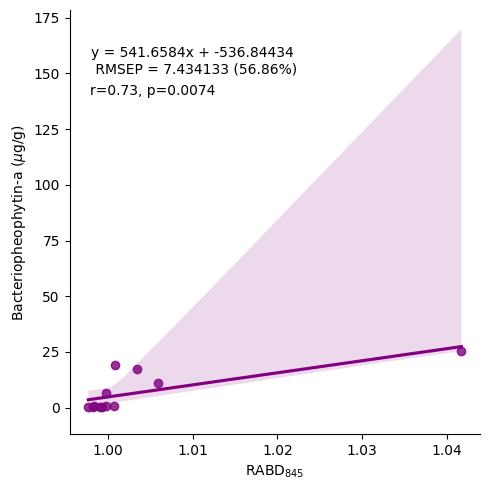

In [75]:
pl4 = sns.lmplot(data=Bphe_cleaned, x='RABD845', y = 'Bphe_ugg', scatter_kws={"color": "purple"}, line_kws={"color":"purple"})# ci=95, n_boot=1000, marker="x", color="b", line_kws=dict(color="b"))
pl4.set(xlabel='RABD$_{845}$',
        ylabel = 'Bacteriopheophytin-a ($\mu$g/g)')#,
        #xlim = [0,160], ylim = [0.98,1.1])# yticks = [0.98,1,1.02,1.04,1.06, 1.08, 1.1]) 
plt.text(0.998, 150, 'y = ' + str(round(slope,5)) + 'x + ' + str(round(intercept,5)) + '\n RMSEP = ' + str(round(rmse1, 6)) + ' (' + str(round(percentage_accuracy1,2)) + '%)')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Bphe_ugg'], data['RABD845'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

pl4.map_dataframe(annotate)

In [76]:
for f, sample_df in df_index.items():
    sample_df['Bphe ug/g'] = (slope * sample_df.RABD845 + intercept).clip(lower=0)
    sample_df.to_csv(f.replace('HSI/', 'HSI_calibrated/').replace('.csv', '_calibrated.csv'), index=False)